In [ ]:
#change directory to the place of my file
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Data Exploration and Cleaning

In [ ]:
'''
After Downloading dataset, I transformed excel file to appropriate csv file
and then uploud it to my google drive for using it in my code!
'''

df = pd.read_csv("Online_Retail.csv",encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
#droping null data
df = df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.duplicated().sum()

5225

In [ ]:
#droping duplicated data
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
#droping negivtive values for quantity

df = df[df['Quantity'] >= 0]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,15287.734822
std,181.588420,22.240725,1713.567773
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


**Now we can see that min value of quantity is 1 which is more resonable**


In [ ]:
df.reset_index()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
392727,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
392728,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
392729,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
392730,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


**Our Dataset reduced from 541908	rows to 392731**

#Descriptive Analysis

##Numerical varibles

In [ ]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
numeric_cols

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

In [ ]:
print("number of unique values of CostomerID" , len(df['CustomerID'].unique()))
print("number of unique values of 'UnitPrice'" , len(df['UnitPrice'].unique()))
print("number of unique values of 'Quantity'" , len(df['Quantity'].unique()))

number of unique values of CostomerID 4339
number of unique values of 'UnitPrice' 441
number of unique values of 'Quantity' 302


**Numeric Variables:**

*   Quantity
*   UnitPrice



###Price

In [ ]:
#first I will look at the description of this column to
df["UnitPrice"].describe()

count    392732.000000
mean          3.125596
std          22.240725
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

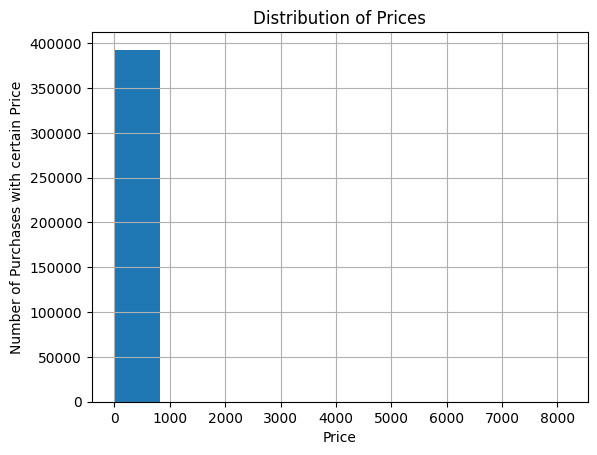

In [ ]:
df["UnitPrice"].hist()
plt.xlabel('Price')
plt.ylabel('Number of Purchases with certain Price')
plt.title('Distribution of Prices')
plt.show()

> ❌ This Plot doesn't give us important information, So ⬇


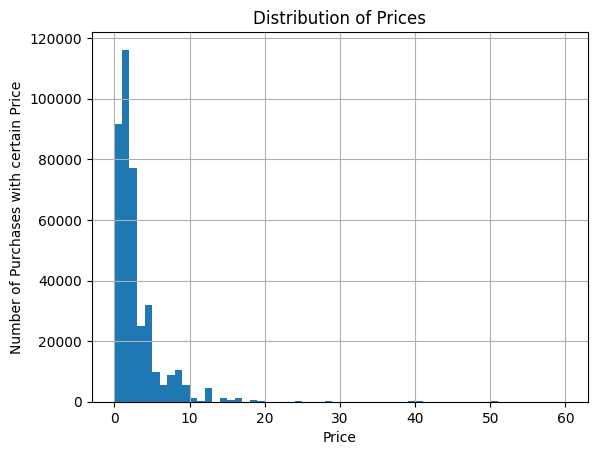

In [ ]:
df["UnitPrice"].hist(bins=60, range=(0,60))
plt.xlabel('Price')
plt.ylabel('Number of Purchases with certain Price')
plt.title('Distribution of Prices')
plt.show()

###Quantity


In [ ]:
#first I will look at the description of this column to

df["Quantity"].describe()

count    392732.000000
mean         13.153718
std         181.588420
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

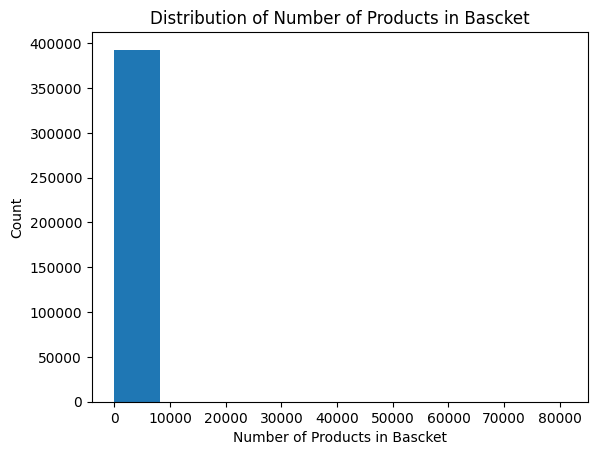

In [ ]:
df["Quantity"].plot.hist()
plt.xlabel("Number of Products in Bascket")
plt.ylabel('Count')
plt.title('Distribution of Number of Products in Bascket')
plt.show()



> ❌ This Plot doesn't give us important information, So ⬇



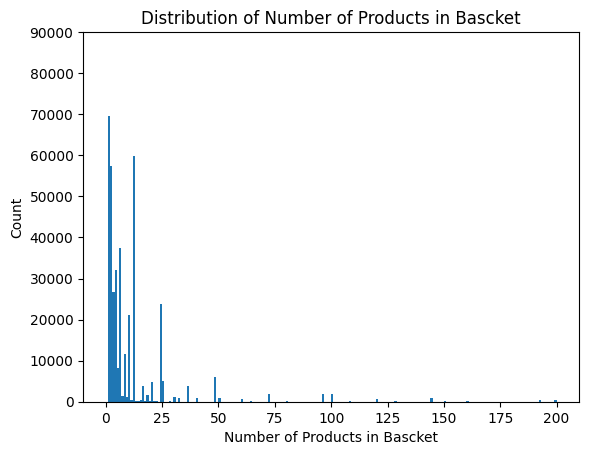

In [ ]:
df["Quantity"].plot.hist(bins=200, range=(0,200),ylim=(0,90000))
plt.xlabel("Number of Products in Bascket")
plt.ylabel('Count')
plt.title('Distribution of Number of Products in Bascket')
plt.show()

###❗Costumer ID

In [ ]:
df['CustomerID'].describe()

count    392732.000000
mean      15287.734822
std        1713.567773
min       12346.000000
25%       13955.000000
50%       15150.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

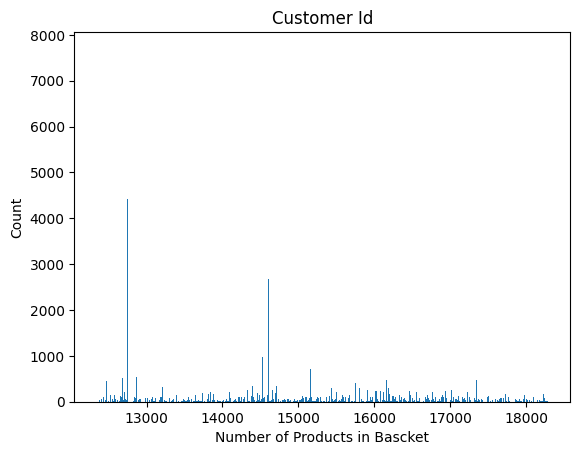

In [ ]:
df['CustomerID'].plot.hist(bins=5941, range=(12346,18287))
plt.xlabel("Number of Products in Bascket")
plt.ylabel('Count')
plt.title('Customer Id')
plt.show()



> ❗❗❗ Although it seems like "CostomerID" is a numerical variable,
 but by definition we can understand that this is a categorical variable.



##Categorical Variables

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
categorical_cols

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [ ]:
print("number of unique values of 'Description'" , len(df['Description'].unique()))
print("number of unique values of 'InvoiceNo' " , len(df['InvoiceNo'].unique()))
print("number of unique values of 'StockCode'" , len(df['StockCode'].unique()))
print("number of unique values of 'InvoiceDate'" , len(df['InvoiceDate'].unique()))
print("number of unique values of  'Country'" , len(df[ 'Country'].unique()))

number of unique values of 'Description' 3877
number of unique values of 'InvoiceNo'  18536
number of unique values of 'StockCode' 3665
number of unique values of 'InvoiceDate' 17286
number of unique values of  'Country' 37


###distribution by country

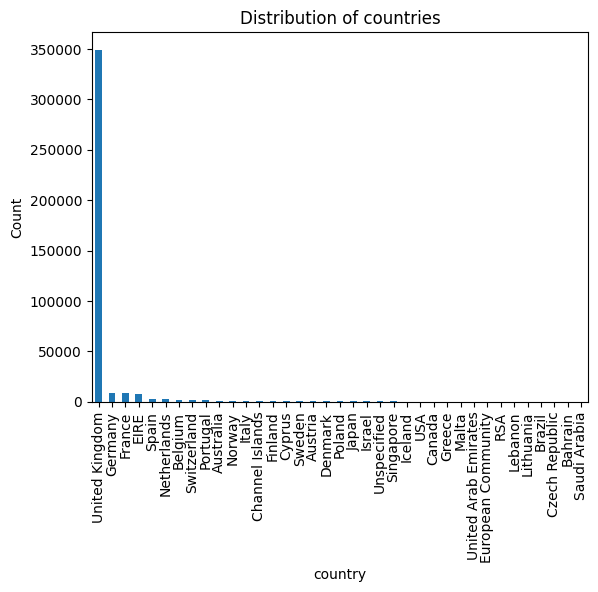

In [ ]:
# Get the count of each category
country = df['Country'].value_counts()
# Create a bar chart
country.plot(kind='bar')
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Distribution of countries')
plt.xticks(rotation=90)
plt.show()

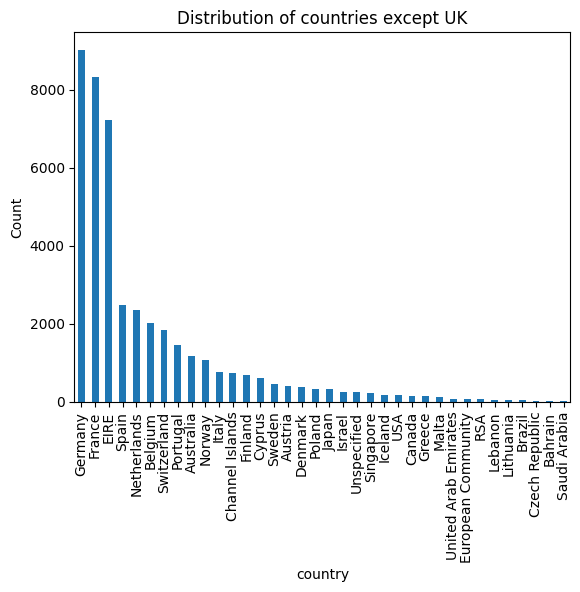

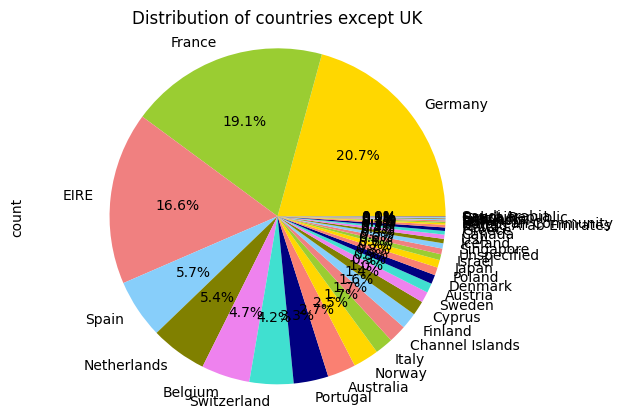

In [ ]:
# Get the count of each category

colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'olive', 'violet', 'turquoise', 'navy', 'salmon']

country = df['Country'].value_counts()
country =country.drop('United Kingdom')

# Create a bar chart
country.plot(kind='bar')
plt.xlabel('country')
plt.ylabel('Count')
plt.title('Distribution of countries except UK')
plt.xticks(rotation=90)
plt.show()

country.plot(kind='pie',colors = colors , autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of countries except UK')
plt.show()


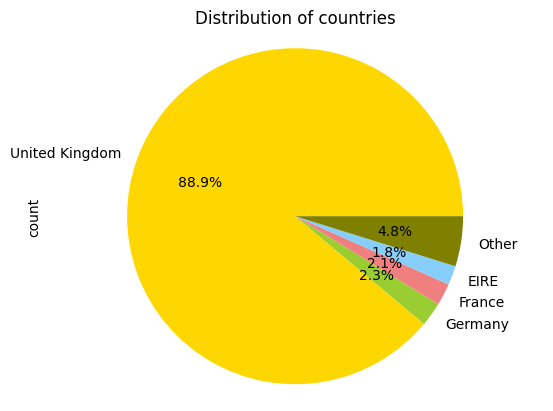

In [ ]:
country_counts = df['Country'].value_counts()
other_threshold = 0.008

other_countries = country_counts[country_counts / country_counts.sum() < other_threshold]
top_countries = country_counts[country_counts / country_counts.sum() > other_threshold]
top_countries['Other'] = other_countries.sum()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'olive', 'violet', 'turquoise', 'navy', 'salmon']
top_countries.plot(kind='pie',colors = colors , autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of countries')
plt.show()

###with Hour

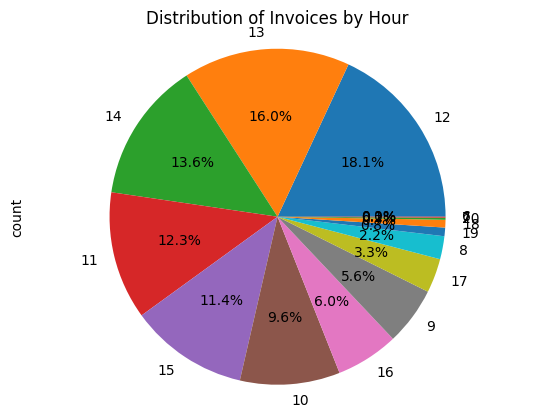

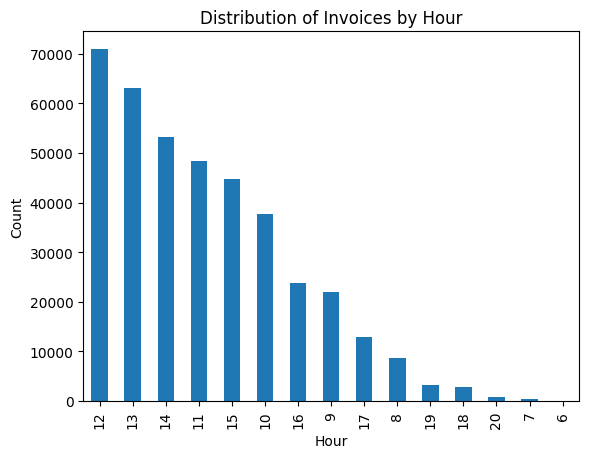

In [ ]:
def extract_hour(df):
    """
    Create a new 'hour' column in the dataframe by extracting the hour from the 'InvoiceDate' column.
    """
    df['hour'] = df['InvoiceDate'].apply(lambda x: str(x.split(" ")[1].split(":")[0]))
    return df

# Assuming you have a dataframe 'df' with a column 'InvoiceDate'
df = extract_hour(df)

# Create a pie chart to visualize the distribution of invoices by hour
hour_counts = df['hour'].value_counts()

hour_counts.plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Invoices by Hour')
plt.show()

hour_counts.plot(kind='bar')

plt.xlabel('Hour')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Distribution of Invoices by Hour')
plt.show()

###with day of week

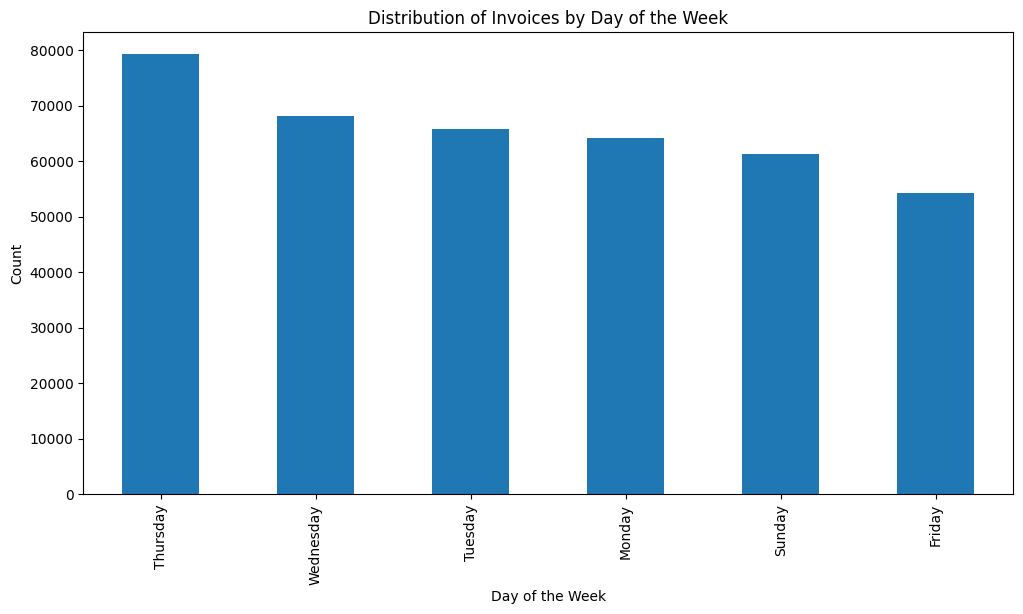

In [ ]:
def extract_day_of_week(df):
    """
    Create a new 'day_of_week' column in the dataframe by extracting the day of the week from the 'InvoiceDate' column.
    """
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['day_of_week'] = df['InvoiceDate'].dt.day_name()
    return df

# Assuming you have a dataframe 'df' with a column 'InvoiceDate'
df = extract_day_of_week(df)

# Create a bar plot to visualize the distribution of invoices by day of the week
day_counts = df['day_of_week'].value_counts()

plt.figure(figsize=(12, 6))
day_counts.plot(kind='bar')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.title('Distribution of Invoices by Day of the Week')
plt.xticks(rotation=90)
plt.show()

###with day of month

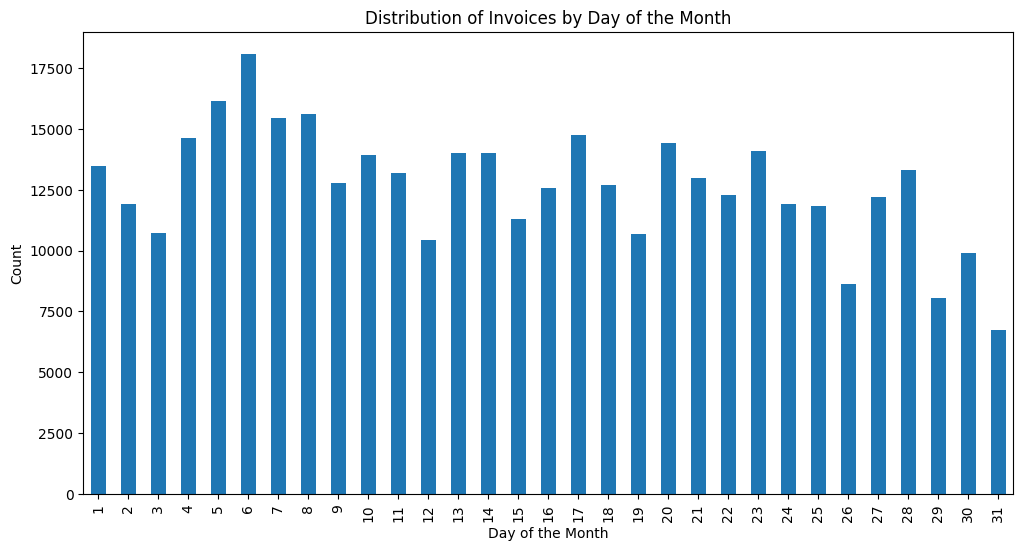

In [ ]:
def extract_day_of_month(df):
    """
    Create a new 'day_of_month' column in the dataframe by extracting the day of the month from the 'InvoiceDate' column.
    """
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
    df['day_of_month'] = df['InvoiceDate'].dt.day
    return df

# Assuming you have a dataframe 'df' with a column 'InvoiceDate'
df = extract_day_of_month(df)

# Create a bar plot to visualize the distribution of invoices by day of the month
day_counts = df['day_of_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
day_counts.plot(kind='bar')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.title('Distribution of Invoices by Day of the Month')
plt.xticks(rotation=90);

#Time-Series Analysis

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['day'] = df['InvoiceDate'].dt.day
df['month'] = df['InvoiceDate'].dt.month
df['year'] = df['InvoiceDate'].dt.year

###daily transactions

In [ ]:
daily_transactions = df.groupby([df['year'], df['month'], df['day']])['InvoiceNo'].count().reset_index()
daily_transactions.columns = ['year', 'month', 'day', 'daily_transactions']

In [ ]:
daily_transactions

,year,month,day,daily_transactions
0,2010,12,1,1898
1,2010,12,2,1959
2,2010,12,3,1086
3,2010,12,5,2603
4,2010,12,6,1897
...,...,...,...,...
300,2011,12,5,3335
301,2011,12,6,2503
302,2011,12,7,2135
303,2011,12,8,2499


In [ ]:
daily_transactions[(daily_transactions['year'] == 2011) & (daily_transactions['month'] == 11)]

,year,month,day,daily_transactions
date,,,,
2011-11-01,2011,11,1,1703
2011-11-02,2011,11,2,1733
2011-11-03,2011,11,3,1928
2011-11-04,2011,11,4,2406
2011-11-06,2011,11,6,3340
2011-11-07,2011,11,7,1710
2011-11-08,2011,11,8,2250
2011-11-09,2011,11,9,2135
2011-11-10,2011,11,10,3104


In [ ]:
daily_transactions[(daily_transactions['year'] == 2011) & (daily_transactions['month'] == 12)]

,year,month,day,daily_transactions
date,,,,
2011-12-01,2011,12,1,2120
2011-12-02,2011,12,2,1939
2011-12-04,2011,12,4,1885
2011-12-05,2011,12,5,3335
2011-12-06,2011,12,6,2503
2011-12-07,2011,12,7,2135
2011-12-08,2011,12,8,2499
2011-12-09,2011,12,9,610


In [ ]:
daily_transactions[(daily_transactions['year'] == 2010) & (daily_transactions['month'] == 12)]

,year,month,day,daily_transactions
date,,,,
2010-12-01,2010,12,1,1898
2010-12-02,2010,12,2,1959
2010-12-03,2010,12,3,1086
2010-12-05,2010,12,5,2603
2010-12-06,2010,12,6,1897
2010-12-07,2010,12,7,1094
2010-12-08,2010,12,8,1909
2010-12-09,2010,12,9,1739
2010-12-10,2010,12,10,1358


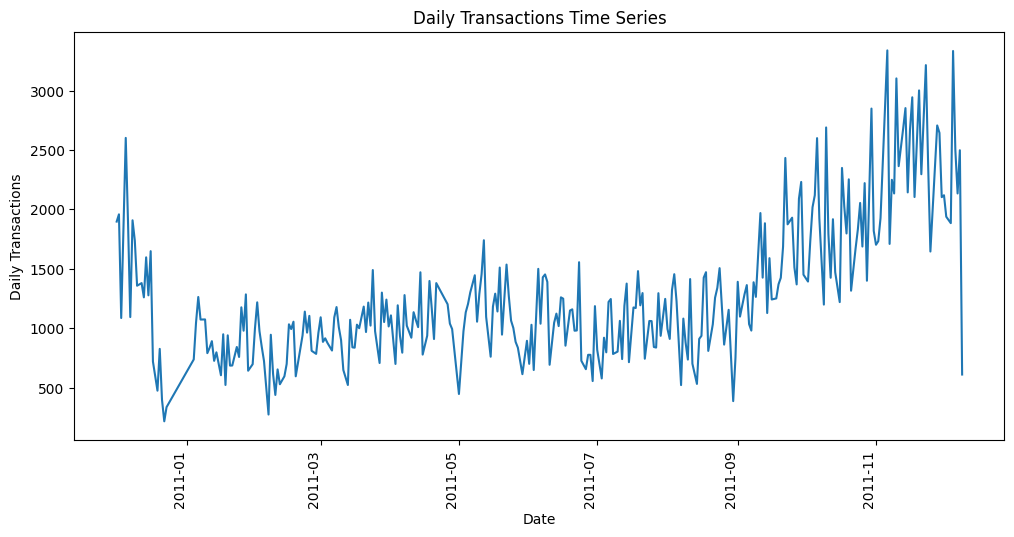

In [ ]:
# Convert the year, month, and day columns to a single datetime index
daily_transactions['date'] = pd.to_datetime(daily_transactions[['year', 'month', 'day']])
daily_transactions = daily_transactions.set_index('date')

# Create the plot
plt.figure(figsize=(12, 6))
daily_transactions['daily_transactions'].plot()
plt.xlabel('Date')
plt.ylabel('Daily Transactions')
plt.title('Daily Transactions Time Series')
plt.xticks(rotation=90)
plt.show()

###Weekly Transactions

<Figure size 1200x600 with 0 Axes>

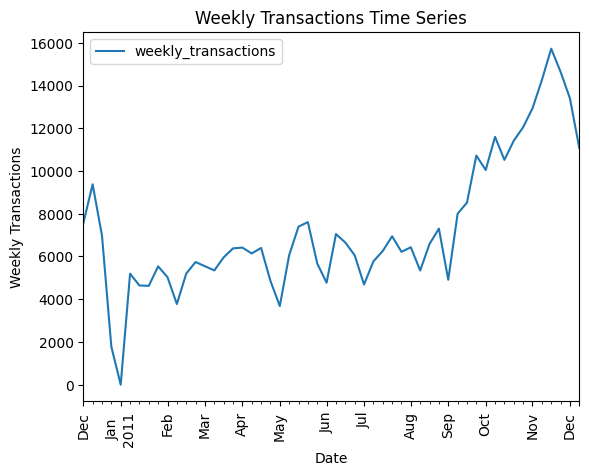

In [ ]:
weekly_transactions = df.groupby(pd.Grouper(key='InvoiceDate', freq='W'))['InvoiceNo'].count().reset_index()
weekly_transactions.columns = ['date', 'weekly_transactions']

# Convert the date column to datetime
weekly_transactions['date'] = pd.to_datetime(weekly_transactions['date'])

# Create the plot
plt.figure(figsize=(12, 6))
weekly_transactions.plot(x='date', y='weekly_transactions', kind='line')
plt.xlabel('Date')
plt.ylabel('Weekly Transactions')
plt.title('Weekly Transactions Time Series')
plt.xticks(rotation=90)
plt.show()

###Monthly Transactions

<Figure size 1200x600 with 0 Axes>

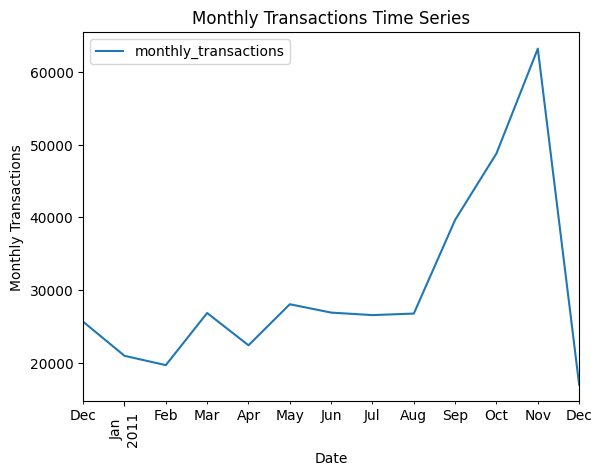

In [ ]:
# Group the data by month and count the number of transactions
monthly_transactions = df.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['InvoiceNo'].count().reset_index()
monthly_transactions.columns = ['date', 'monthly_transactions']

# Convert the date column to datetime
monthly_transactions['date'] = pd.to_datetime(monthly_transactions['date'])

# Create the plot
plt.figure(figsize=(12, 6))
monthly_transactions.plot(x='date', y='monthly_transactions', kind='line')
plt.xlabel('Date')
plt.ylabel('Monthly Transactions')
plt.title('Monthly Transactions Time Series')
plt.xticks(rotation=90)
plt.show()

In [ ]:
monthly_transactions

,date,monthly_transactions
0,2010-12-31,25673
1,2011-01-31,20991
2,2011-02-28,19707
3,2011-03-31,26872
4,2011-04-30,22435
5,2011-05-31,28075
6,2011-06-30,26926
7,2011-07-31,26582
8,2011-08-31,26796
9,2011-09-30,39671


#Customer Segmentation

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [ ]:
df['total_purchase_amount'] = df['Quantity'] * df['UnitPrice']
customer_data = df.groupby('CustomerID')[['total_purchase_amount', 'Quantity']].sum().reset_index()
customer_data_sorted = customer_data.sort_values(by='total_purchase_amount',ascending=False)
customer_data_sorted

,CustomerID,total_purchase_amount,Quantity
1690,14646.0,280206.02,197491
4202,18102.0,259657.30,64124
3729,17450.0,194390.79,69973
3009,16446.0,168472.50,80997
1880,14911.0,143711.17,80490
...,...,...,...
4099,17956.0,12.75,1
3015,16454.0,6.90,3
1794,14792.0,6.20,2
3218,16738.0,3.75,3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


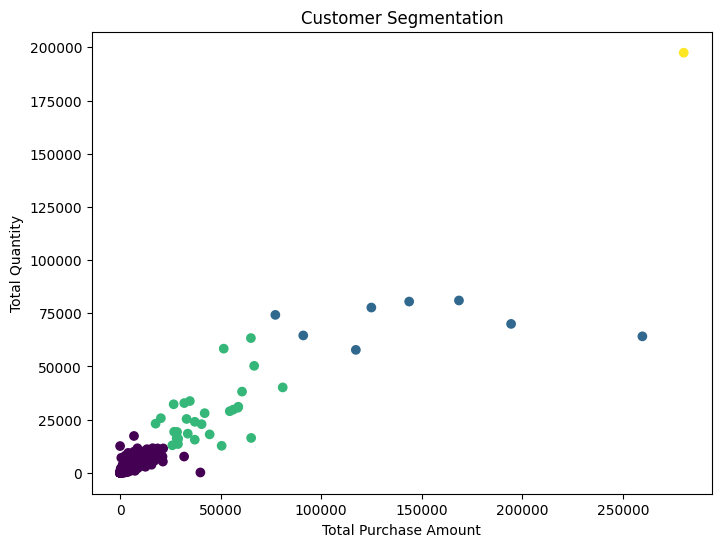

In [ ]:

# Standardize the features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_purchase_amount', 'Quantity']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['total_purchase_amount'], customer_data['Quantity'], c=customer_data['cluster'], cmap='viridis')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Total Quantity')
plt.title('Customer Segmentation')
plt.show()

####**we can drop the outliers for better results**

In [ ]:
customer_data = customer_data.drop([1690,4202])
customer_data

,CustomerID,total_purchase_amount,Quantity,cluster
0,12346.0,77183.60,74215,1
1,12347.0,4310.00,2458,0
2,12348.0,1797.24,2341,0
3,12349.0,1757.55,631,0
4,12350.0,334.40,197,0
...,...,...,...,...
4334,18280.0,180.60,45,0
4335,18281.0,80.82,54,0
4336,18282.0,178.05,103,0
4337,18283.0,2045.53,1357,0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


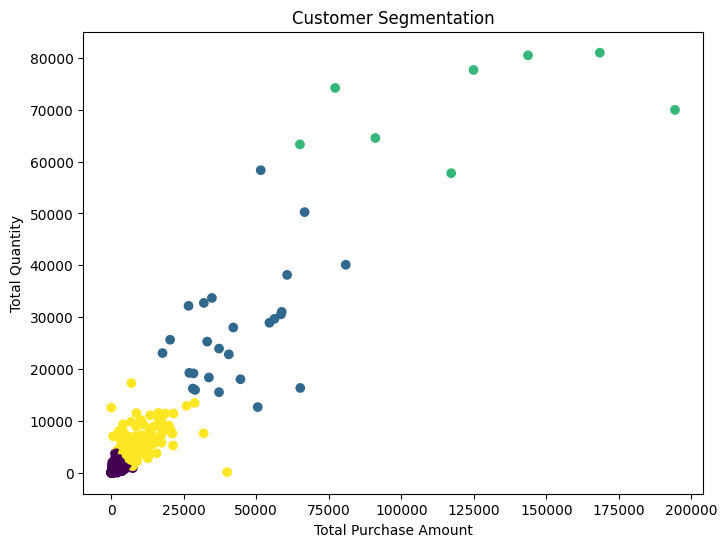

In [ ]:

# Standardize the features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['total_purchase_amount', 'Quantity']])

# Perform k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(customer_data['total_purchase_amount'], customer_data['Quantity'], c=customer_data['cluster'], cmap='viridis')
plt.xlabel('Total Purchase Amount')
plt.ylabel('Total Quantity')
plt.title('Customer Segmentation')
plt.show()

In [ ]:
for cluster in customer_data['cluster'].unique():
    cluster_data = customer_data[customer_data['cluster'] == cluster]
    print(f"Cluster {cluster}:")
    print(f"Average total purchase amount: {cluster_data['total_purchase_amount'].mean():.2f}")
    print(f"Average quantity: {cluster_data['Quantity'].mean():.2f}")
    print(f"Number of customers: {len(cluster_data)}")
    print()

Cluster 2:
Average total purchase amount: 122748.08
Average quantity: 71121.75
Number of customers: 8

Cluster 0:
Average total purchase amount: 963.46
Average quantity: 560.98
Number of customers: 4004

Cluster 3:
Average total purchase amount: 8002.77
Average quantity: 4625.83
Number of customers: 299

Cluster 1:
Average total purchase amount: 42878.28
Average quantity: 27154.42
Number of customers: 26

